In [50]:
import pandas as pd
import numpy as np

from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

1. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### 1.Import data

In [2]:
crime = pd.read_csv("D:\Downloads\Prajnya\Assignments\Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### 2. EDA

In [3]:
crime.shape

(50, 5)

In [4]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime.duplicated().sum()

0

In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
crime = crime.rename({'Unnamed: 0': 'place'}, axis=1)
crime.head()

,place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
crime.kurtosis()

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [11]:
crime.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

<AxesSubplot:>

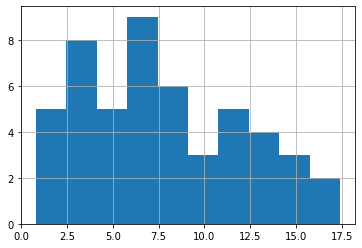

In [12]:
crime['Murder'].hist()

<AxesSubplot:>

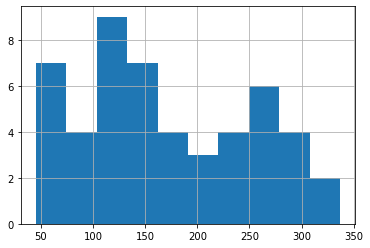

In [13]:
crime['Assault'].hist()

<AxesSubplot:>

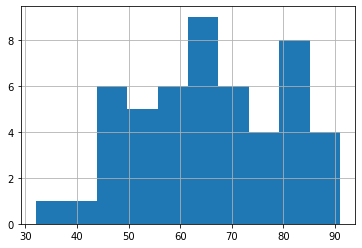

In [14]:
crime['UrbanPop'].hist()

<AxesSubplot:>

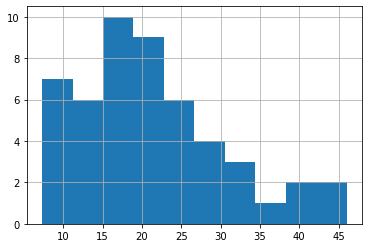

In [15]:
crime['Rape'].hist()

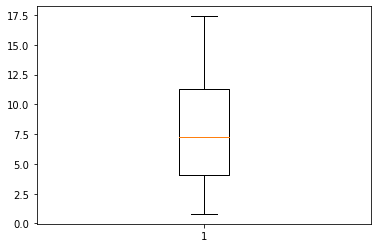

In [16]:
plt.boxplot(crime['Murder'])
plt.show()

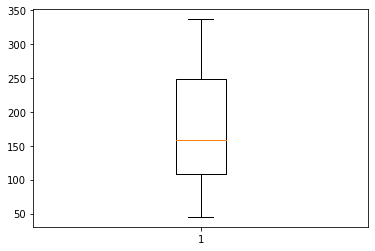

In [17]:
plt.boxplot(crime['Assault'])
plt.show()

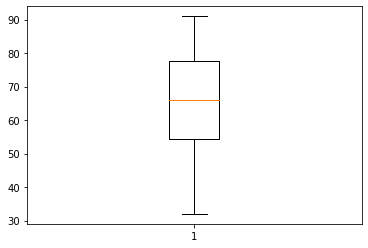

In [18]:
plt.boxplot(crime['UrbanPop'])
plt.show()

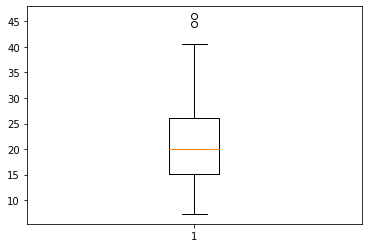

In [19]:
plt.boxplot(crime['Rape'])
plt.show()

In [20]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


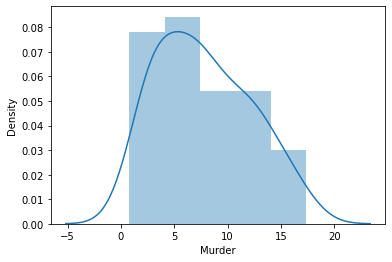

In [21]:
sns.distplot(crime['Murder'])
plt.show()

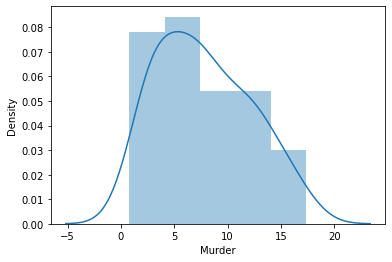

In [22]:
sns.distplot(crime['Murder'])
plt.show()

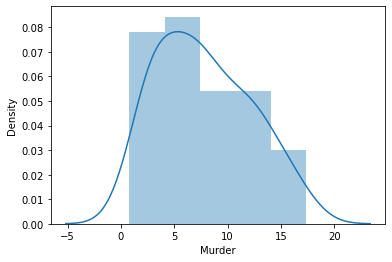

In [23]:
sns.distplot(crime['Murder'])
plt.show()

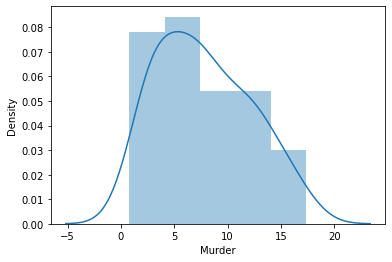

In [24]:
sns.distplot(crime['Murder'])
plt.show()

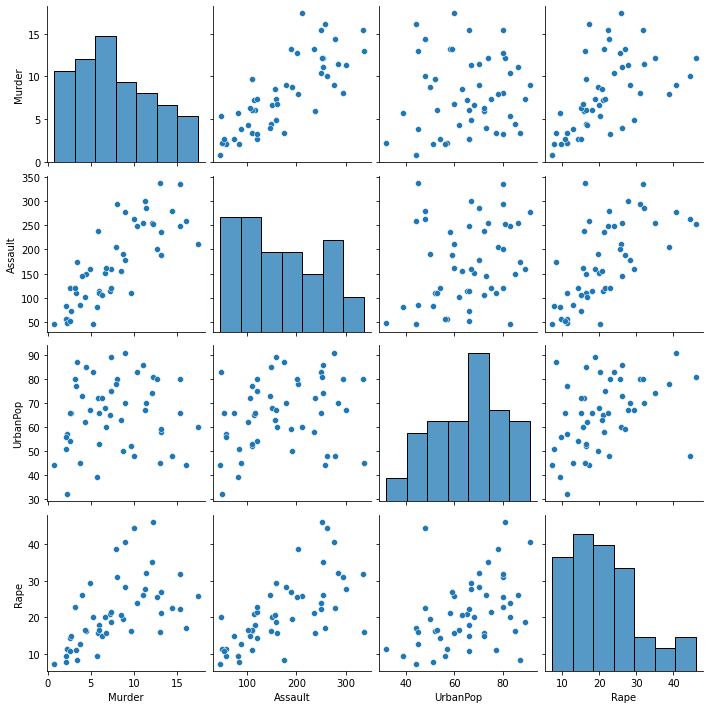

In [25]:
sns.pairplot(crime)

### 3.model training

In [29]:
array=crime.iloc[:,1:].values

In [30]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [32]:
scaler = StandardScaler()
crime_norm = scaler.fit_transform(array)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### 4.Heirarchical clustering

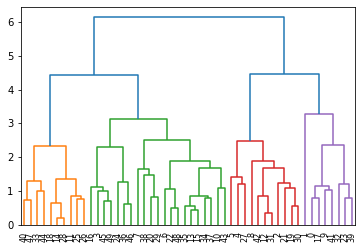

In [33]:
#Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm,method = 'complete'))

In [34]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [35]:
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [36]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
Clusters

,Clusters
0,0
1,0
2,2
3,1
4,2
5,2
6,1
7,1
8,2
9,0


In [38]:
Clusters.value_counts()

Clusters
1           21
2           11
3           10
0            8
dtype: int64

In [39]:
crime['h_clusterid'] = y_hc
crime

,place,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [40]:
crime.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


### 6.DBSCAN

In [41]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1.2, min_samples=4)

In [42]:
dbscan.labels_

array([ 0, -1,  1,  1, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [43]:
crime['DB_Cluster']=pd.DataFrame(dbscan.labels_)
crime

,place,Murder,Assault,UrbanPop,Rape,h_clusterid,DB_Cluster
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,-1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,2,-1
5,Colorado,7.9,204,78,38.7,2,-1
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,2,-1
9,Georgia,17.4,211,60,25.8,0,0


In [44]:
crime['DB_Cluster'].value_counts()

 1    38
 0     7
-1     5
Name: DB_Cluster, dtype: int64

In [45]:
#To find the percentage of noise points 
(len(crime[crime['DB_Cluster']==-1])/len(crime))*100

10.0

In [46]:
X=metrics.silhouette_score(crime_norm,dbscan.labels_)
X

0.2677430171383357

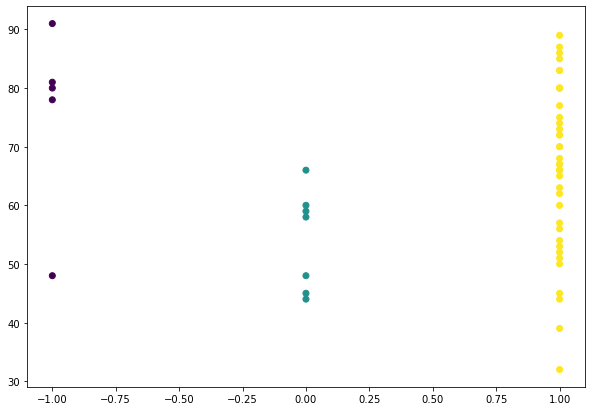

In [49]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['DB_Cluster'],crime['UrbanPop'], c=dbscan.labels_)

### 7.K_means 

[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091104, 50.52026552535068, 43.927464044975736, 40.52183461131976, 34.68738839784909, 32.70648136388185, 28.31163939712256]


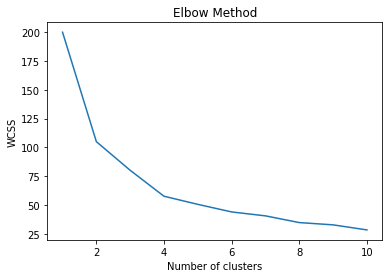

In [51]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(crime_norm)

KMeans(n_clusters=4, random_state=0)

In [54]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [56]:
#Assign clusters to the data set
crime['clusterid_km'] = clusters_new.labels_

In [57]:
crime

,place,Murder,Assault,UrbanPop,Rape,h_clusterid,DB_Cluster,clusterid_km
0,Alabama,13.2,236,58,21.2,0,0,3
1,Alaska,10.0,263,48,44.5,0,-1,1
2,Arizona,8.1,294,80,31.0,2,1,1
3,Arkansas,8.8,190,50,19.5,1,1,3
4,California,9.0,276,91,40.6,2,-1,1
5,Colorado,7.9,204,78,38.7,2,-1,1
6,Connecticut,3.3,110,77,11.1,1,1,0
7,Delaware,5.9,238,72,15.8,1,1,0
8,Florida,15.4,335,80,31.9,2,-1,1
9,Georgia,17.4,211,60,25.8,0,0,3


In [58]:
#These are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [59]:
crime.groupby('clusterid_km').agg(['mean']).reset_index()

,clusterid_km,Murder,Assault,UrbanPop,Rape,h_clusterid,DB_Cluster
,,mean,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,1.000000,1.000000
1,1,10.815385,257.384615,76.000000,33.192308,1.769231,0.230769
2,2,3.600000,78.538462,52.076923,12.176923,2.538462,1.000000
3,3,13.937500,243.625000,53.750000,21.412500,0.125000,0.125000


In [60]:
crime

,place,Murder,Assault,UrbanPop,Rape,h_clusterid,DB_Cluster,clusterid_km
0,Alabama,13.2,236,58,21.2,0,0,3
1,Alaska,10.0,263,48,44.5,0,-1,1
2,Arizona,8.1,294,80,31.0,2,1,1
3,Arkansas,8.8,190,50,19.5,1,1,3
4,California,9.0,276,91,40.6,2,-1,1
5,Colorado,7.9,204,78,38.7,2,-1,1
6,Connecticut,3.3,110,77,11.1,1,1,0
7,Delaware,5.9,238,72,15.8,1,1,0
8,Florida,15.4,335,80,31.9,2,-1,1
9,Georgia,17.4,211,60,25.8,0,0,3


In [62]:
crime['clusterid_km'].value_counts()

0    16
1    13
2    13
3     8
Name: clusterid_km, dtype: int64